# CNN
Convolutional neural network.

See Geron chapter 14 page 461.

In [71]:
# See chapter 10 for introduction to the fashion data
import numpy as np
import tensorflow as tf
from tensorflow import keras

fashion = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion.load_data()
X_valid = X_train_full[:5000]/255.0 ## 5K instances
X_train = X_train_full[5000:]/255.0 ## 55K instances
y_valid = y_train_full[:5000]/255.0
y_train = y_train_full[5000:]/255.0

# Scaling. Not in book but menioned here.
# https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]    

## Generic multi-layer perceptron (MLP)
Use the Keras Sequential API.

In [72]:
mlp = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense( 10,activation="softmax")
])
mlp.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_42 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [73]:
mlp.layers

In [74]:
# Keras layers have attributes: weights, shape, bias.
mlp.layers[1].weights

[<tf.Variable 'dense_41/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.00949231, -0.07326481, -0.03615466, ..., -0.05291411,
          0.05218945,  0.05057444],
        [-0.06510207, -0.01711185, -0.0125735 , ..., -0.04161602,
          0.02865133,  0.03194676],
        [-0.05532871, -0.02575465, -0.01780033, ...,  0.01775415,
         -0.06965847, -0.05281751],
        ...,
        [ 0.03049061,  0.0249197 , -0.02081945, ..., -0.00492986,
         -0.02583749, -0.02884695],
        [-0.06356924,  0.04064874,  0.04277783, ...,  0.06169103,
          0.0056579 ,  0.02281784],
        [-0.00314973, -0.02318164, -0.01542872, ..., -0.06776607,
          0.03941371,  0.05769822]], dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [75]:
# See page 302 for explanation of these parameters.
# See also the keras docs e.g. 
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy
# Note keras can take parameters for % train vs % validation.

mlp.compile(loss="sparse_categorical_crossentropy",
           optimizer="sgd",
           metrics=["accuracy"])
# 30 epochs runs for about 15 minutes and never impoves on 1st epoch.
# Therefore we changed epochs to 10.
history = mlp.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.1006 - val_loss: 3.5975e-04 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.6776e-04 - accuracy: 0.1008 - val_loss: 1.6554e-04 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4806e-04 - accuracy: 0.1008 - val_loss: 1.0530e-04 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0158e-04 - accuracy: 0.1008 - val_loss: 7.6475e-05 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 7.6943e-05 - accuracy: 0.1008 - val_loss: 5.9701e-05 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 6.1725e-05 - accuracy: 0.1008 - val_loss: 4.8776e-05 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 5.1417e-05 - acc

### Terrible!

Our results are terrible.
We have 10% accuracy and it never changes through the epochs.
In contrast, the book got 80% accuracy initially and it improved slightly.
The only difference that I see is memory size.
Our memory allowed 1719 instances per epoch
but the book shows 55,000.
The results change so little between epochs
that we wondered if the training was doing anything.
However, notice that the validation loss is decreasing ever so slightly.
Training loss at zero indicates the model is overfitting.
Perhaps that is not surprising when you only have 1000 instances.
Validation loss is also zero -- which is confusing -- but notice
the validation accuracy is lower than the training accuracy.

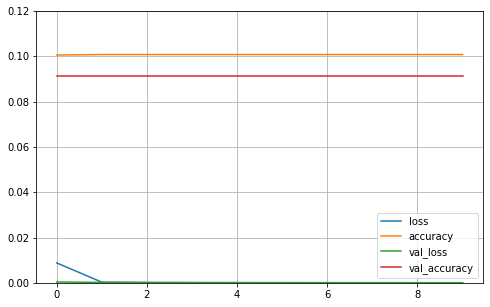

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.12)
plt.show()

In [77]:
# This shows that trainging did SOMETHING. 
mlp.layers[1].weights

[<tf.Variable 'dense_41/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[ 0.00946796, -0.07321969, -0.03613696, ..., -0.05293379,
          0.05216682,  0.05058879],
        [-0.06516861, -0.01699957, -0.01253715, ..., -0.04163028,
          0.02857628,  0.0319768 ],
        [-0.05543339, -0.02548885, -0.01768645, ...,  0.01769667,
         -0.06978405, -0.05272345],
        ...,
        [ 0.03009379,  0.02513929, -0.02072118, ..., -0.00511081,
         -0.02583815, -0.02866308],
        [-0.06384243,  0.04099159,  0.04287643, ...,  0.06153727,
          0.00543676,  0.02291184],
        [-0.00325899, -0.02298617, -0.01536065, ..., -0.06785548,
          0.03931228,  0.05775665]], dtype=float32)>,
 <tf.Variable 'dense_41/bias:0' shape=(300,) dtype=float32, numpy=
 array([ 3.24822823e-03, -6.45994768e-03, -2.19068327e-03,  2.74419016e-03,
         1.21264625e-03,  3.07788514e-03, -1.33076473e-03,  1.40163209e-03,
         3.02412035e-03,  1.02341943e-03, -1.16648051e-04,  1.206

## Generic CNN
Use three layers following the design on page 461.

In [84]:
import keras.layers as kl
cnn = keras.models.Sequential([
    kl.Conv2D(filters=64,kernel_size=7,activation="relu",padding="SAME",
    input_shape=[28,28,1]),
    kl.MaxPooling2D(2),
    kl.Conv2D(128,3,activation="relu",padding="same"),
    kl.Conv2D(128,3,activation="relu",padding="same"),
    kl.MaxPooling2D(2),   
    kl.Conv2D(256,3,activation="relu",padding="same"),
    kl.Conv2D(256,3,activation="relu",padding="same"),
    kl.MaxPooling2D(2), 
    kl.Flatten(),
    kl.Dense(128,activation="relu"),
    kl.Dropout(0.5),
    kl.Dense(64,activation="relu"),
    kl.Dropout(0.5),    
    kl.Dense(10,activation="softmax")
])
# 10 nodes in the output layer
# corresponds to 10 classes of MNIST clothes.
cnn.layers[0].weights

[<tf.Variable 'conv2d_62/kernel:0' shape=(7, 7, 1, 64) dtype=float32, numpy=
 array([[[[ 0.00986201,  0.01265944,  0.02457138, ...,  0.02516665,
           -0.02956999, -0.03243503]],
 
         [[-0.02815349,  0.00189705, -0.01393528, ..., -0.0322247 ,
            0.02679797, -0.01290373]],
 
         [[ 0.02533486, -0.02377192,  0.01724548, ..., -0.02208702,
            0.03245023, -0.03533415]],
 
         ...,
 
         [[ 0.02358662, -0.00574169,  0.00253955, ..., -0.01412475,
           -0.01934115, -0.00078589]],
 
         [[ 0.00094751, -0.03631891,  0.03298129, ..., -0.02725365,
            0.04045251, -0.04124802]],
 
         [[-0.01916933,  0.02111403,  0.03865586, ...,  0.00056344,
            0.0333082 ,  0.03118422]]],
 
 
        [[[ 0.00660738, -0.02755894,  0.03329207, ..., -0.04063937,
           -0.03945661, -0.00297787]],
 
         [[-0.0244829 ,  0.0415902 , -0.00970466, ..., -0.01882142,
           -0.01335383,  0.0347708 ]],
 
         [[-0.01510699, -0.03503

In [85]:
cnn.compile(loss="sparse_categorical_crossentropy",
           optimizer="sgd",
           metrics=["accuracy"])
# This is very very slow!
# On our laptop, only 1719 instances fit in RAM per epoch.
hist = cnn.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 596s 347ms/step - loss: 0.0306 - accuracy: 0.1002 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 495s 288ms/step - loss: 6.2183e-04 - accuracy: 0.1008 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 489s 284ms/step - loss: 5.8064e-04 - accuracy: 0.1007 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 494s 287ms/step - loss: 4.4487e-04 - accuracy: 0.1008 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 492s 286ms/step - loss: 2.6617e-04 - accuracy: 0.1008 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 540s 314ms/step - loss: 7.7919e-05 - accuracy: 0.1008 - val_loss: 0.0000e+00 - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 572s 333ms/s

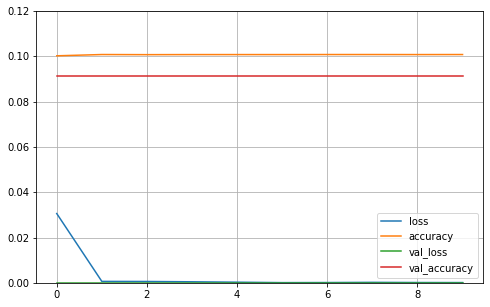

In [86]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.12)
plt.show()

### Terrible!
Our results are terrible.
The accuracy sits at 10% and never changes.
This is probably because, due to laptop memory, mini batches are small.
We noticed that accuracy didn't change whether our CNN had 
one convolutional layer or three, zero dense layers or three.